# Slope Fitting EEG Data

Words, words, words.

In [2]:
%matplotlib inline

import os
import csv
import mne
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import rcParams
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [3]:
#
#from slf.fit import *
#from slf.dat import *

from slf.eeg import comb_corrs, bet_corrs
from slf.core.db import SLFDB
from slf.core.io import load_pickle

### WORDS

In [4]:
# Get project database object
db = SLFDB()

In [5]:
# Load data readme file
rmd_file = os.path.join(db.data_path, 'EEG', 'MIPDB_PublicFile.csv')
df = pd.read_csv(rmd_file, index_col='ID')

In [6]:
# Check distribution of sexes
print('Number of males: \t', sum(df.Sex == 1))
print('Number of females: \t', sum(df.Sex == 2))

Number of males: 	 69
Number of females: 	 57


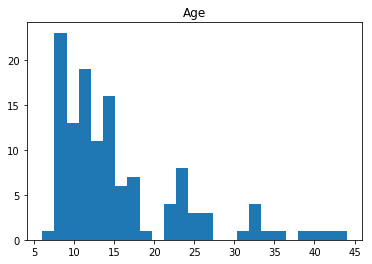

In [7]:
# Age distribution
df.hist('Age', grid=False, bins=25);

In [8]:
print(min(df.Age))
print(max(df.Age))

6
44


### Load subject data

In [9]:
# Check for saved FOOOF files
fres_files = db.check_fooof()

In [10]:
#
all_dat = [load_pickle(f_name, db.fooof_path) for f_name in fres_files]
n_subjs = len(all_dat)

#
print(n_subjs, ' subjects.')

97  subjects.


In [11]:
# Initialize dataframe to store slope data
sl_df = pd.DataFrame(columns=['ID', 'Age', 'Mean_Sl_EO', 'Median_Sl_EO', 'Mean_Sl_EC', 'Median_Sl_EC'])

# Collect data from all subjects
for dat in all_dat:
    
    sl_dat = {'ID': dat['ID'],
              'Age': df.loc[dat['ID']]['Age'],
              'Mean_Sl_EO': np.mean(dat['sls_eo_avg']),
              'Median_Sl_EO': np.median(dat['sls_eo_avg']),
              'Mean_Sl_EC': np.mean(dat['sls_ec_avg']),
              'Median_Sl_EC': np.median(dat['sls_ec_avg'])}
    
    sl_df = sl_df.append(sl_dat, ignore_index=True)

In [12]:
#
sl_df.head()

,ID,Age,Mean_Sl_EO,Median_Sl_EO,Mean_Sl_EC,Median_Sl_EC
0,A00051826,10.0,1.993436,1.993942,1.943103,1.934198
1,A00051886,12.0,1.961429,1.955402,2.031371,2.036248
2,A00051955,12.0,1.482905,1.480297,1.643428,1.658024
3,A00053375,6.0,1.788825,1.805748,1.830345,1.817368
4,A00053440,12.0,2.010997,2.047516,1.879631,1.927993


In [13]:
#
sl_df.describe()

,Age,Mean_Sl_EO,Median_Sl_EO,Mean_Sl_EC,Median_Sl_EC
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,15.536082,1.620618,1.628748,1.670201,1.673671
std,7.860850,0.337902,0.333439,0.334073,0.337170
min,6.000000,0.862034,0.819549,0.490674,0.455303
25%,10.000000,1.381715,1.381238,1.428849,1.435579
50%,13.000000,1.660264,1.671098,1.690207,1.690879
75%,18.000000,1.899647,1.893650,1.904737,1.916576
max,44.000000,2.268051,2.260224,2.383702,2.408580


### Words

In [14]:
sl_df.Age * z[0] + 

SyntaxError: invalid syntax (<ipython-input-14-eb4c6faec51e>, line 1)

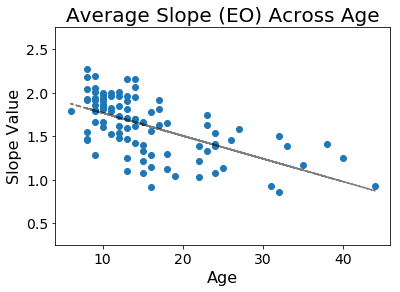

In [16]:
# Check EO Data Slope Vals
plt.figure()#figsize=[8, 6])
ax= plt.subplot(111)
ax.scatter(sl_df.Age, sl_df.Mean_Sl_EO)

plt.title('Average Slope (EO) Across Age', fontsize=20)
plt.ylim(0.25, 2.75);

plt.xlabel('Age', fontsize=16)
plt.ylabel('Slope Value', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14);

z = np.polyfit(sl_df.Age, sl_df.Mean_Sl_EO, deg=1)
plt.plot(sl_df.Age, z[0]*sl_df.Age + z[1], '--k', alpha=0.5);

# Save out figure
plt.savefig('eo_age_scatter.png', format='png', bbox_inches='tight', dpi=300)

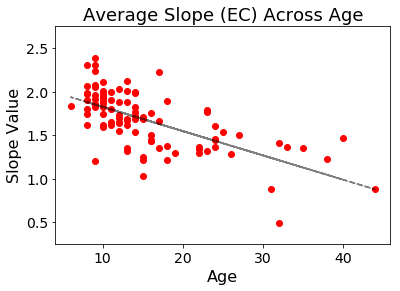

In [19]:
# Check EC Data Slope Vals
#plt.figure(figsize=[8, 6])

ax= plt.subplot(111)
ax.scatter(sl_df.Age, sl_df.Mean_Sl_EC, color='r')

plt.title('Average Slope (EC) Across Age', fontsize=18)
plt.ylim(0.25, 2.75);

plt.xlabel('Age', fontsize=16)
plt.ylabel('Slope Value', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14);

z = np.polyfit(sl_df.Age, sl_df.Mean_Sl_EC, deg=1)
plt.plot(sl_df.Age, z[0]*sl_df.Age + z[1], '--k', alpha=0.5);

# Save out figure
plt.savefig('ec_age_scatter.png', format='png', bbox_inches='tight', dpi=300)

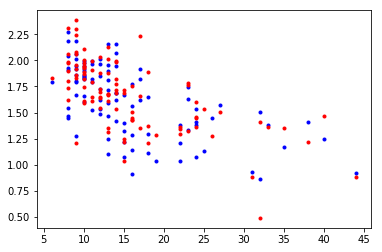

In [20]:
# Plot EC & EO Data Together
plt.figure()
plt.plot(sl_df.Age, sl_df.Mean_Sl_EO, 'b.');
plt.plot(sl_df.Age, sl_df.Mean_Sl_EC, 'r.');

In [21]:
# 
print(pearsonr(sl_df.Age, sl_df.Median_Sl_EO))
print(pearsonr(sl_df.Age, sl_df.Median_Sl_EC))

(-0.61891872720881391, 1.412174574929715e-11)
(-0.65600880652256288, 3.0252285936166791e-13)


In [22]:
#
print('Kids corr')
inds = sl_df.Age < 18
print('\t', pearsonr(sl_df.Age[inds], sl_df.Mean_Sl_EC[inds]))

#
print('Adults corr')
inds = sl_df.Age > 18
print('\t', pearsonr(sl_df.Age[inds], sl_df.Mean_Sl_EC[inds]))

Kids corr
	 (-0.47901591456446196, 2.0751093375713447e-05)
Adults corr
	 (-0.43233704130970235, 0.044485328533605803)


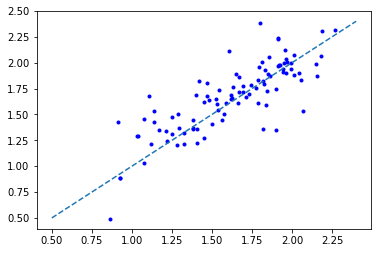

In [23]:
# Plot EC & EO Data Together
plt.figure()
plt.plot(sl_df.Mean_Sl_EO, sl_df.Mean_Sl_EC, 'b.')
line_dat = np.arange(0.5, 2.5, 0.1)
plt.plot(line_dat, line_dat, '--')

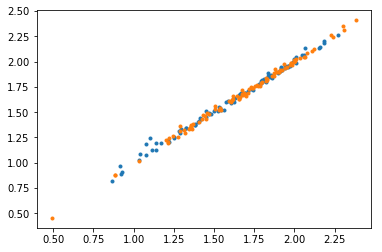

In [24]:
# Check mean vs. median
plt.plot(sl_df.Mean_Sl_EO, sl_df.Median_Sl_EO, '.')
plt.plot(sl_df.Mean_Sl_EC, sl_df.Median_Sl_EC, '.')

In [25]:
# Correlation between EC and EO data
print(pearsonr(sl_df.Median_Sl_EO, sl_df.Median_Sl_EC))

(0.81316191434445029, 4.6756095933346456e-24)


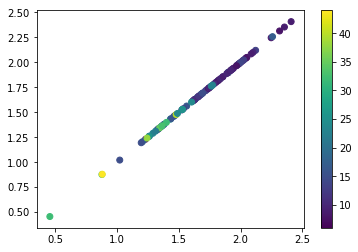

In [26]:
# Scatter with colormap mapping to z value
plt.scatter(sl_df.Median_Sl_EC, sl_df.Median_Sl_EC, c=sl_df.Age)
plt.colorbar()

### Group Topo Plots

In [27]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../data/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
n_chs = len(ch_labels)
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

# Create the info structure needed by MNE
info = mne.create_info(ch_labels, 500, 'eeg', montage)

# Create the MNE Raw data object
raw = mne.io.RawArray(np.zeros([111, 1]), info, verbose=False)

### Words

In [28]:
#
sl_dat_eo = np.zeros(shape=[n_chs, n_subjs])
sl_dat_ec = np.zeros(shape=[n_chs, n_subjs])

#
for ind, dat in enumerate(all_dat):
    sl_dat_eo[:, ind] = dat['sls_eo_avg']
    sl_dat_ec[:, ind] = dat['sls_ec_avg']
    
#
sl_dat_eo_avg = sl_dat_eo.mean(axis=1)
sl_dat_ec_avg = sl_dat_ec.mean(axis=1)

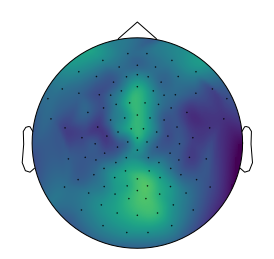

In [29]:
# Plot slope topography from average eyes-open data
mne.viz.plot_topomap(sl_dat_eo_avg, raw.info, vmin=1.5, vmax=1.8, cmap=cm.viridis, contours=0);

In [30]:
# Check range of data values
print('Min: ', sl_dat_eo_avg.min())
print('Max: ', sl_dat_eo_avg.max())

Min:  1.54355986243
Max:  1.71806172236


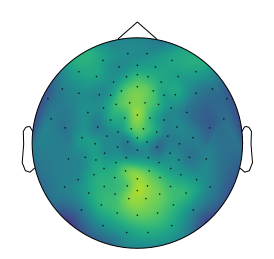

In [31]:
# Plot slope topography from average eyes-open data
im = mne.viz.plot_topomap(sl_dat_ec_avg, raw.info, vmin=1.5, vmax=1.8, cmap=cm.viridis, contours=0);

In [32]:
# Check range of data values
print('Min: ', sl_dat_ec_avg.min())
print('Max: ', sl_dat_ec_avg.max())

Min:  1.58995158094
Max:  1.76238299937


In [33]:
import matplotlib as mpl

In [34]:
#plt.colorbar(im, cmap=cm.viridis)

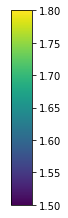

In [35]:
fig = plt.figure(figsize=(2, 3))
#ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax1 = fig.add_axes([0.9, 0.25, 0.15, 0.9])

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=1.5, vmax=1.8)

cb1 = mpl.colorbar.ColorbarBase(plt.gca(), cmap=cmap,
                                norm=norm,
                                orientation='vertical')

#plt.savefig
plt.savefig('colorbar.png', format='png', bbox_inches='tight', dpi=300)

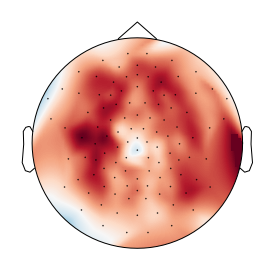

-0.016498250237
0.0966336469809


In [36]:
#
diff_sl = [sec - seo for sec, seo in zip(sl_dat_ec_avg, sl_dat_eo_avg)]

mne.viz.plot_topomap(diff_sl, raw.info, contours=0);

print(min(diff_sl))
print(max(diff_sl))

In [37]:
# Check the correlation between EC and EO data
pearsonr(sl_dat_ec_avg, sl_dat_eo_avg)

(0.87600114537737783, 2.6364221844094102e-36)

In [38]:
len(dat['sls_ec'])

5

In [39]:
#
corrs_eo = []
corrs_ec = []
corrs_bet = []

for dat in all_dat:
    
    corrs_eo.append(np.mean(comb_corrs(dat['sls_eo'])))
    corrs_ec.append(np.mean(comb_corrs(dat['sls_ec'])))
    corrs_bet.append(np.mean(bet_corrs(dat['sls_eo'], dat['sls_ec'])))

corrs_ec = [it for it in corrs_ec if not np.isnan(it)]

corrs_diff_eo = []
corrs_diff_ec = []
corrs_diff_ec_eo = []
for ii, jj in zip(range(n_subjs-1), range(1, n_subjs)):
    corrs_diff_eo.append(np.mean(bet_corrs(all_dat[ii]['sls_ec'], all_dat[jj]['sls_ec'])))
    corrs_diff_ec.append(np.mean(bet_corrs(all_dat[ii]['sls_eo'], all_dat[jj]['sls_eo'])))
    corrs_diff_ec_eo.append(np.mean(bet_corrs(all_dat[ii]['sls_ec'], all_dat[jj]['sls_eo'])))

/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/tom/anaconda/envs/eeg36/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [40]:
print(np.mean(corrs_eo))
print(np.mean(corrs_ec))
print(np.mean(corrs_bet))
print(np.mean(corrs_diff_ec))
print(np.mean(corrs_diff_eo))
print(np.mean(corrs_diff_ec_eo))

0.400173222482
0.525881113967
0.380779288249
0.0533651748536
0.0711207578704
0.0559466141813


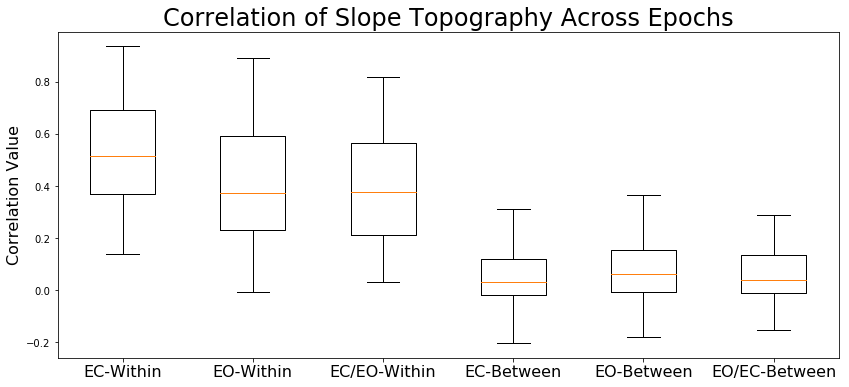

In [41]:
# Plot the correlations across epochs

fig, ax = plt.subplots(figsize=(14, 6))

plt.boxplot([corrs_ec, corrs_eo, corrs_bet, corrs_diff_ec, corrs_diff_eo, corrs_diff_ec_eo]);

plt.title('Correlation of Slope Topography Across Epochs', fontsize=24);
plt.ylabel('Correlation Value', fontsize=16);

labels=['EC-Within', 'EO-Within', 'EC/EO-Within', 'EC-Between', 'EO-Between', 'EO/EC-Between']
xtickNames = plt.setp(ax, xticklabels=labels)
plt.setp(xtickNames, fontsize=16);

# Save out figure
#plt.savefig('topo_corr_boxplot.png', format='png', bbox_inches='tight', dpi=300)

In [42]:
# Check the spatial correlation
ind = 2
print(pearsonr(sl_dat_ec_avg, montage.pos[:, ind]))
print(pearsonr(sl_dat_eo_avg, montage.pos[:, ind]))

(0.35350334999475391, 0.00014130520579788385)
(0.26726998120919937, 0.0045715770548444799)


In [43]:
# Collapse to 2D topography
pos_2d = montage.get_pos2d()

In [44]:
# Check the spatial correlation
ind = 1
print(pearsonr(sl_dat_ec_avg, pos_2d[:, ind]))
print(pearsonr(sl_dat_eo_avg, pos_2d[:, ind]))

(-0.22830098584413605, 0.015952939941101991)
(-0.31508062523561242, 0.00075654602479136642)


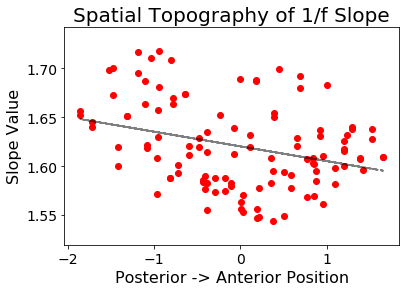

In [50]:
# Plot scatter matrix of slopes vs. postitions
ind = 1
#plt.figure(figsize=[8, 6])
plt.scatter(pos_2d[:, ind], sl_dat_eo_avg, color='r');

plt.title('Spatial Topography of 1/f Slope', fontsize=20);
plt.xlabel('Posterior -> Anterior Position', fontsize=16);
plt.ylabel('Slope Value', fontsize=16);

plt.tick_params(axis='both', which='major', labelsize=14);

z = np.polyfit(pos_2d[:, ind], sl_dat_eo_avg, deg=1)
plt.plot(pos_2d[:, ind], z[0]*pos_2d[:, ind] + z[1], '--k', alpha=0.5);

# Save out figure
plt.savefig('ant_pos_corr.png', format='png', bbox_inches='tight', dpi=300)

In [46]:
# Check the spatial correlation
ind = 0
print(pearsonr(sl_dat_ec_avg, abs(pos_2d[:, ind])))
print(pearsonr(sl_dat_eo_avg, abs(pos_2d[:, ind])))

(-0.67329547889960795, 5.6962671364337978e-16)
(-0.65382081349754517, 7.2644229196356118e-15)


In [47]:
5 * 16

80

In [48]:
5 * 30

150

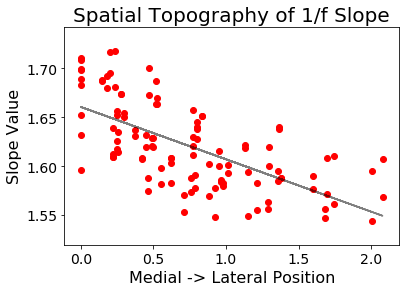

In [51]:
# Plot scatter matrix of slopes vs. postitions
ind = 0
#plt.figure(figsize=[8, 6])
plt.scatter(abs(pos_2d[:, ind]), sl_dat_eo_avg, color='r');

plt.title('Spatial Topography of 1/f Slope', fontsize=20);
plt.xlabel('Medial -> Lateral Position', fontsize=16);
plt.ylabel('Slope Value', fontsize=16);

plt.tick_params(axis='both', which='major', labelsize=14);

z = np.polyfit(abs(pos_2d[:, ind]), sl_dat_eo_avg, deg=1)
plt.plot(abs(pos_2d[:, ind]), z[0]*abs(pos_2d[:, ind]) + z[1], '--k', alpha=0.5);

# Save out figure
plt.savefig('med_lat_corr.png', format='png', bbox_inches='tight', dpi=300)

### OLD

In [ ]:
# # Get available subject PSD files
# psd_files = db.get_psd_files()

# #
# subjs = [ff.split('_')[0] for ff in psd_files]
# subj_files = [{'ID': subj, 'EC': ec_f, 'EO': eo_f} for subj, ec_f, eo_f in zip(subjs[0::2],
#                                                 [fi for fi in psd_files if 'ec' in fi],
#                                                 [fi for fi in psd_files if 'eo' in fi])]

# # Number of subjects
# print('Number of subjects: ', len(subj_files))

In [ ]:
# # FOOOF - EC - old

# f_range = [3, 35]
# fm = FOOOF(bandwidth_limits=[1, 8], max_n_oscs=6)

# # Eyes Closed Data
# ec_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

# for sf in subj_files:
    
#     freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EC']))

#     res = []
#     for psd in psds:
#         fm.fit(freqs, psd, [freqs.min(), freqs.max()])
#         res.append(fm.get_params())
    
#     sls = [fr.background_params[1] for fr in res]

#     sl_dat = {'ID': sf['ID'], 'Age': df.loc[sf['ID']]['Age'],
#               'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

#     ec_sl_df = ec_sl_df.append(sl_dat, ignore_index=True)

In [ ]:
# # FOOOF - EO - old
# f_range = [3, 35]
# fm = FOOOF(bandwidth_limits=[1, 8], max_n_oscs=6)

# # Eyes Open Data
# eo_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

# for sf in subj_files:
    
#     freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EO']))

#     res = []
#     for psd in psds:
#         fm.fit(freqs, psd, [freqs.min(), freqs.max()])
#         res.append(fm.get_params())
    
#     sls = [fr.background_params[1] for fr in res]

#     sl_dat = {'ID': sf['ID'], 'Age': df.loc[sf['ID']]['Age'],
#               'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

#     eo_sl_df = eo_sl_df.append(sl_dat, ignore_index=True)